In [150]:
import requests
import json
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [34]:
units_factor = {'ml/min/kg':60 ,'ml/min':float(60/1000), 'ml/h/kg':1,'l/h':1,"l/h/kg":1000,"ml/min/1.73m^2":1}
units_mapping = {'ml/min/kg':'ml/h/kg','ml/min':'ml/h', 'ml/h/kg':'ml/h/kg','l/h':'l/h',"l/h/kg":"ml/h/kg","ml/min/1.73m^2":"ml/min/1.73m^2" }       

In [28]:


def get_interventions_pk(x):
        interventions_columns = [col for col in x.index if 'interventions' in col]
        interventions_pk = [col for col in interventions_columns if 'pk' in col]
        return x[interventions_pk]
        


    #row_categories = list(x[x.index)
    #row_values = [category[:-8]+"value" for category in row_categories]
    # x[row_choices]
    #return list(x[row_values].dropna())   


def get_dosing(x):
    row_categories = list(x[x == "dosing"].index)
    row_values = [category[:-8]+"value" for category in row_categories]
    # x[row_choices]
    return list(x[row_values].dropna())    
    
def norm_value(df_row):
    factor = units_factor[df_row.unit]
    value = None
    if df_row.value:
        value = df_row.value
    elif df_row.mean:
        value = df_row["mean"]
    elif df_row.median:
        value = df_row["median"]
    if value:
        return float(value) * factor

In [4]:
outputs_url = "http://0.0.0.0:8000/api/v1/outputs_elastic/?substance=caffeine&pktype=clearance&final=true"
response = requests.get(outputs_url)
num_pages = response.json()["last_page"]
data = []
for page in range(2,num_pages +1):
    url = outputs_url + f"&page={page}"
    response = requests.get(url)
    data += response.json()["data"]["data"]

flatten_data = [flatten_json(d) for d in data]
df_outputs = pd.DataFrame(flatten_data)

In [5]:
individual_ids = set(df_outputs["individual_pk"].dropna())
individual_ids_joined = "__".join([str(int(id)) for id in individual_ids])
df_outputs["individual_pk"] = df_outputs["individual_pk"].fillna(0).astype(int)

In [10]:
group_ids = set(df_outputs["group_pk"].dropna())
group_ids_joined = "__".join([str(int(id)) for id in group_ids])
df_outputs["group_pk"] = df_outputs["group_pk"].fillna(0).astype(int)

In [ ]:
#group_ids = set(df_outputs["interventions_pk"].dropna())
#group_ids_joined = "__".join([str(int(id)) for id in group_ids])
#df_outputs["group_pk"] = df_outputs["group_pk"].fillna(0).astype(int)

,interventions_0_pk,interventions_1_pk,interventions_2_pk,interventions_3_pk,interventions_4_pk
0,311.0,316.0,NaN,NaN,NaN
1,311.0,316.0,NaN,NaN,NaN
2,311.0,316.0,NaN,NaN,NaN
3,311.0,316.0,NaN,NaN,NaN
4,311.0,316.0,NaN,NaN,NaN
5,311.0,316.0,NaN,NaN,NaN
6,311.0,316.0,NaN,NaN,NaN
7,311.0,316.0,NaN,NaN,NaN
8,311.0,316.0,NaN,NaN,NaN
9,311.0,316.0,NaN,NaN,NaN


In [7]:
response  = requests.get(f"http://0.0.0.0:8000/api/v1/individuals_elastic/?ids={individual_ids_joined}")
num_pages = response.json()["last_page"]
indivdiuals_url  = f"http://0.0.0.0:8000/api/v1/individuals_elastic/?ids={individual_ids_joined}"
data = []
for page in range(2,num_pages +1):
    url = indivdiuals_url + f"&page={page}"
    response = requests.get(url)
    data += response.json()["data"]["data"]
flatten_data = [flatten_json(d) for d in data]
df_individuals = pd.DataFrame(flatten_data)

In [12]:
response  = requests.get(f"http://0.0.0.0:8000/api/v1/groups_elastic/?ids={group_ids_joined}")
num_pages = response.json()["last_page"]
groups_url  = f"http://0.0.0.0:8000/api/v1/groups_elastic/?ids={group_ids_joined}"
data = []
for page in range(2,num_pages +1):
    url = groups_url + f"&page={page}"
    response = requests.get(url)
    data += response.json()["data"]["data"]
flatten_data = [flatten_json(d) for d in data]
df_groups = pd.DataFrame(flatten_data)

In [ ]:
response  = requests.get(f"http://0.0.0.0:8000/api/v1/interventions_elastic/?ids=intervention_ids_joined}")
num_pages = response.json()["last_page"]
interventions_url  = f"http://0.0.0.0:8000/api/v1/interventions_elastic/?ids={group_ids_joined}"
data = []
for page in range(2,num_pages +1):
    url = interventions_url + f"&page={page}"
    response = requests.get(url)
    data += response.json()["data"]["data"]
flatten_data = [flatten_json(d) for d in data]
df_interventions = pd.DataFrame(flatten_data)

In [13]:
complete = pd.merge(df_individuals,df_outputs, left_on="pk", right_on="individual_pk")
#complete = pd.merge(df_groups,df_outputs, left_on="pk", right_on="group_pk")

In [14]:
complete

,characteristica_all_final_0_category,characteristica_all_final_0_choice,characteristica_all_final_0_count,characteristica_all_final_0_ctype,characteristica_all_final_0_cv,characteristica_all_final_0_max,characteristica_all_final_0_mean,characteristica_all_final_0_median,characteristica_all_final_0_min,characteristica_all_final_0_pk,...,pk_y,pktype,sd,se,substance_name,time,time_unit,tissue,unit,value
0,weight,None,10,group,0.21,82.00,59.80,None,38.00,4285,...,5662,clearance,None,None,caffeine,NaN,None,plasma,ml/min/kg,None
1,weight,None,10,group,0.21,82.00,59.80,None,38.00,4285,...,5663,clearance,None,None,caffeine,NaN,None,saliva,ml/min/kg,None
2,age,None,10,group,0.16,20.00,15.70,None,12.00,4290,...,5621,clearance,None,None,caffeine,NaN,None,plasma,ml/min/kg,None
3,age,None,12,group,None,39.00,None,None,24.00,4486,...,5895,clearance,0.97,0.28,caffeine,NaN,None,plasma,ml/min/kg,None
4,oral contraceptives,Y,10,group,None,None,None,None,None,4517,...,6225,clearance,10.60,3.35,caffeine,NaN,None,plasma,ml/min,None
5,oral contraceptives,N,10,group,None,None,None,None,None,4518,...,6145,clearance,30.50,9.64,caffeine,NaN,None,plasma,ml/min,None
6,oral contraceptives,N,10,group,None,None,None,None,None,4518,...,6147,clearance,27.40,8.66,caffeine,NaN,None,plasma,ml/min,None
7,oral contraceptives,N,10,group,None,None,None,None,None,4518,...,6149,clearance,30.10,9.52,caffeine,NaN,None,plasma,ml/min,None
8,oral contraceptives,N,10,group,None,None,None,None,None,4518,...,6151,clearance,28.70,9.08,caffeine,NaN,None,plasma,ml/min,None
9,oral contraceptives,Y,10,group,None,None,None,None,None,4519,...,6235,clearance,13.50,4.27,caffeine,NaN,None,plasma,ml/min,None


In [ ]:
pk = df_outputs.apply(get_interventions_pk,axis=1)
pd.merge(left=df)

In [131]:
def get_bodyweight(x):
    row_categories = list(x[x == "weight"].index)
    fields = ["value","mean","median"]
    for field in fields:
        row_choices = [category[:-8]+field for category in row_categories]
        for bodyweight in list(x[row_choices]):
            try:
                if float(bodyweight) > 0:
                    return float(bodyweight)
            except:
                pass
def get_clearnce_per_kg(bodyweight,clearance,unit):  
    if "kg" in unit:
        return clearance, unit
    elif bodyweight and clearance:
        bw_clearance = clearance*bodyweight
        return bw_clearance, unit +"/kg"
    else:
        return None, None

def get_sex(x):
        row_categories = list(x[x == "sex"].index)
        row_choices = [category[:-8]+"choice" for category in row_categories]
        row_counts = [category[:-8]+"count" for category in row_categories]
        print(row_choices)
        zipped = zip(x[row_choices],x[row_counts])
        zipped = sorted(zipped, key=lambda x: x[1])

        if zipped:
            
            print(zipped[0])
            return zipped[0][0]
        #sexes = pd.DataFrame([x[row_choices],x[row_counts]],columns=["sex","count"]).sort_values("count")

        #for sex in sexes.iterrows():
            #print(sex)
        #return sex["sex"] 




In [132]:
def calculate_all(x):
    result = {}
    
    result["norm_value"] = norm_value(x)
    result["norm_unit"] = units_mapping[x["unit"]]
    individual_pk = x.get("individual_pk")
    group_pk = x.get("group_pk")
    if individual_pk > 0:
        response  = requests.get(f"http://0.0.0.0:8000/api/v1/individuals_elastic/{individual_pk}/")
        individual = pd.Series(flatten_json(response.json()))
        
        result["weight"] = get_bodyweight(individual)
        result["study"] = individual.study_name
        result["sex"] = get_sex(individual)


    elif group_pk > 0 :
        response  = requests.get(f"http://0.0.0.0:8000/api/v1/groups_elastic/{group_pk}/")
        group = pd.Series(flatten_json(response.json()))
        result["weight"] =get_bodyweight(group)
        result["study"] = group.study_name
        result["sex"] = get_sex(group)

    
    else:
        return  pd.Series(result)
    
    result["value_bw"], result["unit_bw"] = get_clearnce_per_kg(result["weight"],result["norm_value"],result["norm_unit"]) 
    return  pd.Series(result)
    

In [133]:
result1 = df_outputs.apply(calculate_all, axis=1)

['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_all_final_8_choice']
('F', 20)
['characteristica_al

['characteristica_all_final_5_choice']
('M', 33)
['characteristica_all_final_6_choice']
('M', 33)
['characteristica_all_final_4_choice']
('M', 12)
['characteristica_all_final_4_choice']
('M', 12)
['characteristica_all_final_4_choice']
('M', 12)
['characteristica_all_final_1_choice']
('M', 12)
['characteristica_all_final_2_choice']
('M', 12)
['characteristica_all_final_3_choice']
('F', 11)
['characteristica_all_final_3_choice']
('F', 11)
['characteristica_all_final_1_choice']
('M', 12)
['characteristica_all_final_2_choice']
('M', 12)
['characteristica_all_final_3_choice']
('F', 11)
['characteristica_all_final_3_choice']
('F', 11)
['characteristica_all_final_4_choice']
('M', 12)
['characteristica_all_final_4_choice']
('M', 12)
['characteristica_all_final_4_choice']
('M', 12)
['characteristica_all_final_4_choice']
('M', 12)
['characteristica_all_final_4_choice']
('M', 12)
['characteristica_all_final_2_choice']
('M', 16)
['characteristica_all_final_2_choice']
('M', 16)
['characteristica_al

['characteristica_all_final_2_choice', 'characteristica_all_final_3_choice']
('M', 5)
['characteristica_all_final_2_choice', 'characteristica_all_final_3_choice']
('M', 5)
['characteristica_all_final_6_choice']
('M', 12)
['characteristica_all_final_6_choice']
('M', 12)
['characteristica_all_final_6_choice']
('M', 12)
['characteristica_all_final_6_choice']
('M', 12)
['characteristica_all_final_6_choice']
('M', 12)
['characteristica_all_final_6_choice']
('M', 12)
['characteristica_all_final_6_choice']
('M', 12)
['characteristica_all_final_6_choice']
('M', 12)
['characteristica_all_final_6_choice']
('M', 12)
['characteristica_all_final_6_choice']
('M', 12)
['characteristica_all_final_6_choice']
('M', 12)
['characteristica_all_final_6_choice']
('M', 12)
['characteristica_all_final_6_choice']
('M', 12)
['characteristica_all_final_6_choice']
('M', 12)
['characteristica_all_final_6_choice']
('M', 12)
['characteristica_all_final_6_choice']
('M', 12)
['characteristica_all_final_6_choice']
('M',

['characteristica_all_final_3_choice', 'characteristica_all_final_4_choice']
('F', 4)
['characteristica_all_final_1_choice', 'characteristica_all_final_2_choice']
('F', 3)
['characteristica_all_final_1_choice', 'characteristica_all_final_2_choice']
('F', 3)
['characteristica_all_final_1_choice', 'characteristica_all_final_2_choice']
('F', 3)
['characteristica_all_final_1_choice', 'characteristica_all_final_2_choice']
('F', 3)
['characteristica_all_final_1_choice', 'characteristica_all_final_2_choice']
('F', 3)
['characteristica_all_final_1_choice', 'characteristica_all_final_2_choice']
('F', 3)
['characteristica_all_final_1_choice', 'characteristica_all_final_2_choice']
('F', 3)
['characteristica_all_final_1_choice', 'characteristica_all_final_2_choice']
('F', 3)
['characteristica_all_final_1_choice', 'characteristica_all_final_2_choice']
('F', 3)
['characteristica_all_final_1_choice', 'characteristica_all_final_2_choice']
('F', 3)
['characteristica_all_final_1_choice', 'characteristic

In [134]:
result1

,norm_unit,norm_value,sex,study,unit_bw,value_bw,weight
0,ml/h,5.262,F,Balogh1995,None,NaN,NaN
1,ml/h,7.500,F,Balogh1995,None,NaN,NaN
2,ml/h,2.256,F,Balogh1995,None,NaN,NaN
3,ml/h,6.840,F,Balogh1995,None,NaN,NaN
4,ml/h,7.500,F,Balogh1995,None,NaN,NaN
5,ml/h,4.428,F,Balogh1995,None,NaN,NaN
6,ml/h,5.556,F,Balogh1995,None,NaN,NaN
7,ml/h,5.928,F,Balogh1995,None,NaN,NaN
8,ml/h,4.302,F,Balogh1995,None,NaN,NaN
9,ml/h,2.244,F,Balogh1995,None,NaN,NaN


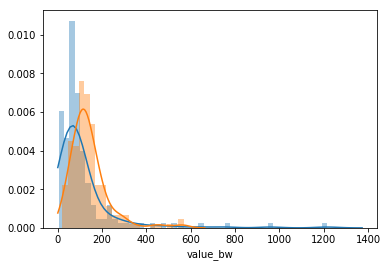

In [164]:
r1 = result1[result1["unit_bw"]=="ml/h/kg"]
for name, group in r1.groupby("sex"):
    norm_clearance = group["value_bw"].dropna()
    sns.distplot(norm_clearance,kde_kws={'clip': (0.0,100000 )})


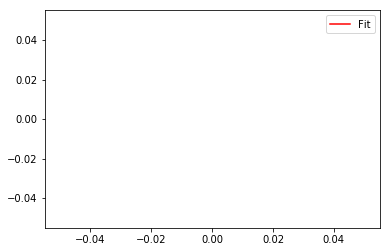

In [155]:
df = r1
params = stats.gamma.fit(df.value_bw, loc=0)
xvals = np.linspace(0, df.value_bw.max())
pdf = lambda x: stats.gamma.pdf(xvals, *params)
yvals = pdf(xvals)

fig, ax1 = plt.subplots()

#df.value_bw.hist(bins=20, ax=ax1, density=True, label='value_bw',
#                grid=False, edgecolor='k')

plt.plot(xvals, yvals, axes=ax1, c='r', label='Fit')
ax1.legend()


In [90]:
len(norm_clearance)

372

In [98]:
r1.loc[r1["value_bw"].idxmin()]

norm_unit           ml/h
norm_value        0.0456
study         Joeres1988
unit_bw          ml/h/kg
value_bw          3.2376
weight                71
Name: 328, dtype: object

In [97]:
16.2*75

1215.0

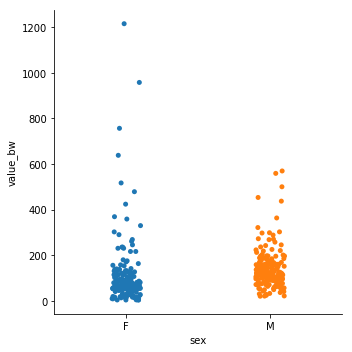

In [137]:
r1 = result1[result1["unit_bw"]=="ml/h/kg"]

sns.catplot(x="sex", y="value_bw", data=r1);
